# Atividade 03

## Redes Neurais Simples
### Utilizando a biblioteca Scikit-Learn 

 Realizamos o treinamento da Rede Neural para interpolar uma função $\sin()$ no intervalo de $0$ a $2 \pi$. Criamos um conjunto de dados sintético onde a entrada é um ângulo e a saída desejada é o seu valor de $\sin()$. Isso é um problema de regressão onde o modelo terá que aprender a mapear ângulos para seus respectivos valores de $\sin()$.

In [1]:
# Importando bibliotecas importantes
import numpy as np
import matplotlib.pyplot as plt

# Importando uma classe específica chamada MLPRegressor de um submódulo chamado neural_network dentro da biblioteca scikit-learn
from sklearn.neural_network import MLPRegressor

Para a criação dos dados de treinamento temos:

- `np.random.seed`: Inicializa um gerador de números aleatórios, que nesse caso será 42. Isso significa que sempre que o código for executado a sequência aleatória será a mesma.

- `num.samples`: Número de exemplos de treinamento que serão criados para treinar a Rede Neural.

- `angles_train`: Gera os valores de entrada para o treinamento da Rede Neural.

    - `np.random.uniform(0, 4*np.pi, num_samples)`: Usa-se a função `uniform` do módulo `random` do NumPy para gerar `num_samples` (que é 100) números aleatórios que são **uniformemente distribuídos** entre $0$ (inclusive) e $4 \pi$ (exclusive). 
    
        Em radianos, $4 \pi$ representa duas voltas completas no círculo unitário. Esses números provavelmente representam os **ângulos** para os quais queremos prever o valor do seno.

    - `.reshape(-1,1)`: É usado para reformatar o array resultante. O $-1$ indica que o NumPy deve inferir o número de linhas com base no tamanho do array original, e o $1$ especifica que queremos uma única coluna.

        O resultado é um array com 100 linhas e 1 coluna, onde cada elemento é um ângulo gerado aleatoriamente. Essa formatação é frequentemente necessária em bibliotecas de aprendizado de máquina, como o scikit-learn, que esperam que os dados de entrada tenham essa estrutura (cada amostra em uma linha e cada característica em uma coluna).

    - `sin_values_train = np.sin(angles_train)`: Calcula o $\sin()$ de cada um dos ângulos armazenados no array `angles_train` usando a função `np.sin()` do NumPy. 
    
        O resultado é armazenado na variável `sin_values_train`. Este array terá a mesma forma de `angles_train` (100 linhas e 1 coluna) e conterá os valores do $\sin()$ correspondentes a cada ângulo. Esses serão provavelmente os valores alvo (as saídas desejadas) para o nosso modelo de regressão.


In [2]:
# Criação dos dados de treinamento 
np.random.seed(42) 
num_samples = 100
angles_train = np.random.uniform(0, 4 * np.pi, num_samples).reshape(-1, 1) 
sin_values_train = np.sin(angles_train)

Agora vamos adicionar um pouco de ruído aos dados de treinamento que acabamos de gerar para tornar os dados de treinamento mais realistas e robustos.

- `noise = np.random.normal(0, 0.1, sin_values_train.shape)`: Gera-se um array de ruído usando a função `np.random.normal()`.

    - 0: Este é o primeiro argumento e representa a média (loc) da distribuição normal (gaussiana) da qual os números aleatórios serão amostrados. Uma média de 0 significa que o ruído será centrado em torno de zero.

    - 0.1: Este é o segundo argumento e representa o desvio padrão (scale) da distribuição normal. Um desvio padrão de $0.1$ define a "largura" da distribuição do ruído. Valores menores indicam que o ruído estará mais concentrado perto de zero (menos intensidade), enquanto valores maiores resultariam em ruído mais disperso (maior intensidade).

    - `sin_values_train.shape`: Este é o terceiro argumento e especifica a forma (shape) do array de ruído que será gerado. Ao usar a mesma forma de `sin_values_train`, garantimos que teremos um valor de ruído correspondente a cada valor de $\sin()$ em nosso conjunto de treinamento.

    - `sin_values_train += noise`: Esta linha realiza uma adição elemento a elemento entre o array `sin_values_train` (que contém os valores do $\sin()$ "limpos") e o array noise que acabamos de gerar. O operador `+=` significa que o resultado da adição é armazenado de volta na variável `sin_values_train`, modificando-a diretamente.

In [ ]:
# Adicionando ruído aos dados
noise = np.random.normal(0, 0.1, sin_values_train.shape)
sin_values_train += noise

c:\Users\pf010\AppData\Local\miniconda3\envs\sklearn-env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error on Test Data: 0.45996820465424393


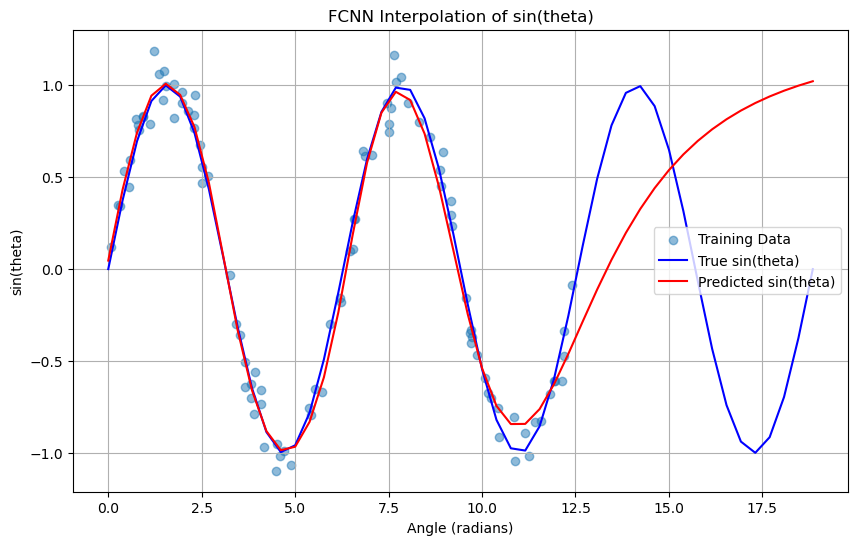

In [ ]:
# 2. Define and Train the FCNN Model
# MLPRegressor expects input features to be 2D arrays (n_samples, n_features)
# For a simple angle input, n_features is 1

# Define the model
model = MLPRegressor(
    hidden_layer_sizes=(10,10,10),  # One hidden layer with 10 neurons
    activation='tanh',         # Rectified Linear Unit activation function
    solver='adam',             # Optimization algorithm
    max_iter=100000,             # Maximum number of iterations
    random_state=42,            # For reproducibility,
    learning_rate_init = 0.001,
    tol = 1e-8
)

# Train the model
model.fit(angles_train, sin_values_train)

# 3. Generate Test Data for Evaluation
num_test_samples = 50
angles_test = np.linspace(0, 6 * np.pi, num_test_samples).reshape(-1, 1)
sin_values_true = np.sin(angles_test)

# 4. Make Predictions
sin_values_predicted = model.predict(angles_test)

# 5. Evaluate the Model (Optional, but good practice)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(sin_values_true, sin_values_predicted)
print(f"Mean Squared Error on Test Data: {mse}")

# 6. Visualize the Results
plt.figure(figsize=(10, 6))
plt.scatter(angles_train, sin_values_train, label='Training Data', alpha=0.5)
plt.plot(angles_test, sin_values_true, label='True sin(theta)', color='blue')
plt.plot(angles_test, sin_values_predicted, label='Predicted sin(theta)', color='red')
plt.xlabel('Angle (radians)')
plt.ylabel('sin(theta)')
plt.title('FCNN Interpolation of sin(theta)')
plt.legend()
plt.grid(True)
plt.show()